In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
import gensim.downloader as api
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report ,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from PIL import Image
from IPython.display import display

In [3]:
df1=pd.read_csv(r"C:\Users\Jaya Teja\Finance_Project\Final datasets\AAPL_final.csv")
df2=pd.read_csv(r"C:\Users\Jaya Teja\Finance_Project\Final datasets\AMZN_final.csv")
df3=pd.read_csv(r"C:\Users\Jaya Teja\Finance_Project\Final datasets\TSLA_final.csv")

1- Apple  
2- Amazon  
3- Tesla  

In [4]:
# The reason for mentioning comapnies with name is for final judging process of the entire portfolio as the dataset will be divided for test 

In [5]:
df1['Company']=1

### graph of 1 and 0 s pie chart 

In [6]:
df1.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,title,Label,Company
0,0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900,What A 'Strong' Apple 2022 Product Line Up Cou...,1,1
1,1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400,Is $3 Trillion Just the Beginning for Apple? A...,0,1
2,2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,Dow industrials knocking on door of milestone ...,0,1
3,3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,Here's what's worth streaming in January 2022 ...,0,1
4,4,2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,Samsung Electronics expects 52% jump in Q4 ope...,1,1


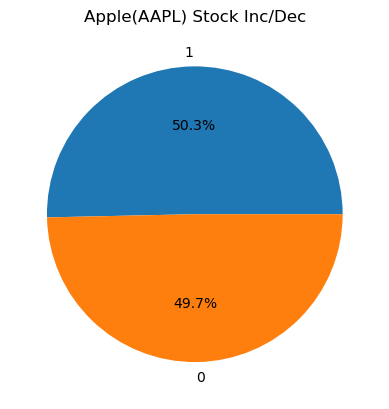

In [7]:
import matplotlib.pyplot as plt
value_counts = df1['Label'].value_counts()
pie_data = value_counts.values
pie_labels = value_counts.index
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")
plt.title("Apple(AAPL) Stock Inc/Dec")
plt.show()

In [8]:
df2['Company']=2#

### graph of 1 and 0 piechart ,

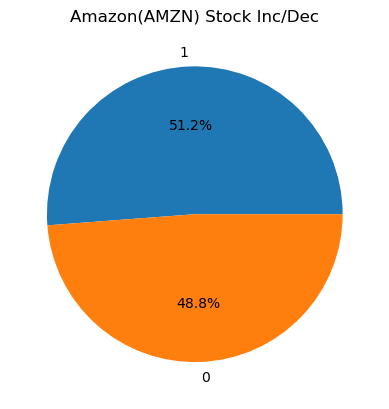

In [9]:
value_counts = df2['Label'].value_counts()
pie_data = value_counts.values
pie_labels = value_counts.index
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")
plt.title("Amazon(AMZN) Stock Inc/Dec")
plt.show()

In [10]:
df2

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,title,Label,Company
0,0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,Updating 2021 Calls While Suggesting Strategic...,1,2
1,1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,"The Best Stocks to Invest $1,000 in Right Now ...",0,2
2,2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,"The Zacks Analyst Blog Highlights: Apple, Alph...",0,2
3,3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,Here's what's worth streaming in January 2022 ...,0,2
4,4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,ViacomCBS: A Deal Waiting To Happen The Divide...,0,2
...,...,...,...,...,...,...,...,...,...,...,...
577,577,2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,"SCHD: If You've Won The Game, Take A Little Of...",1,2
578,578,2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,"This Is Hands Down My Pick for the Best ""Magni...",1,2
579,579,2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,History Says the Nasdaq Could Soar: 2 Top Grow...,0,2
580,580,2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,"If You Invested $10,000 in Amazon 10 Years Ago...",0,2


In [11]:
df3['Company']=3

### graph of 1 and 0 pie chart 

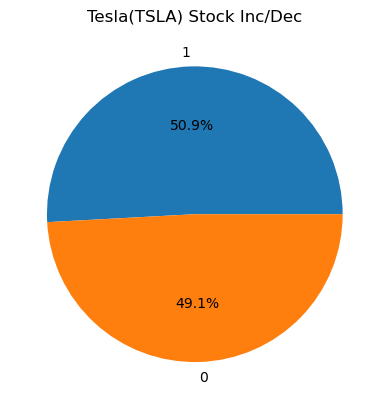

In [12]:
value_counts = df3['Label'].value_counts()
pie_data = value_counts.values
pie_labels = value_counts.index
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")
plt.title("Tesla(TSLA) Stock Inc/Dec")
plt.show()

In [13]:
df3

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,title,Label,Company
0,0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,LG Energy Solution starts taking orders for wh...,1,3
1,1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,"Tesla opens showroom in Xinjiang, the Chinese ...",0,3
2,2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,Tesla And These 2 Chipmakers Are Seeing The Hi...,0,3
3,3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,This Coin Named After Elon Musk's Pet Floki is...,0,3
4,4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,Cathie Wood Sells Another $4.9M In Tesla Stock...,0,3
...,...,...,...,...,...,...,...,...,...,...,...
577,577,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600,"It's Time to Ditch These 2 ""Magnificent Seven""...",0,3
578,578,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100,"Cathie Wood's Ark Invest Seizes Tesla Dip, Acq...",1,3
579,579,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000,Tesla (TSLA) Q1 2024 Earnings Call Transcript ...,1,3
580,580,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,126427500,To Lower Or Not? EV Pricing Dilemma Hampers Fo...,1,3


In [14]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [15]:
df.size

19206

### graph of combined 1 and 0 s , and also the adj close of all the bove df1,2,3 in a single graph

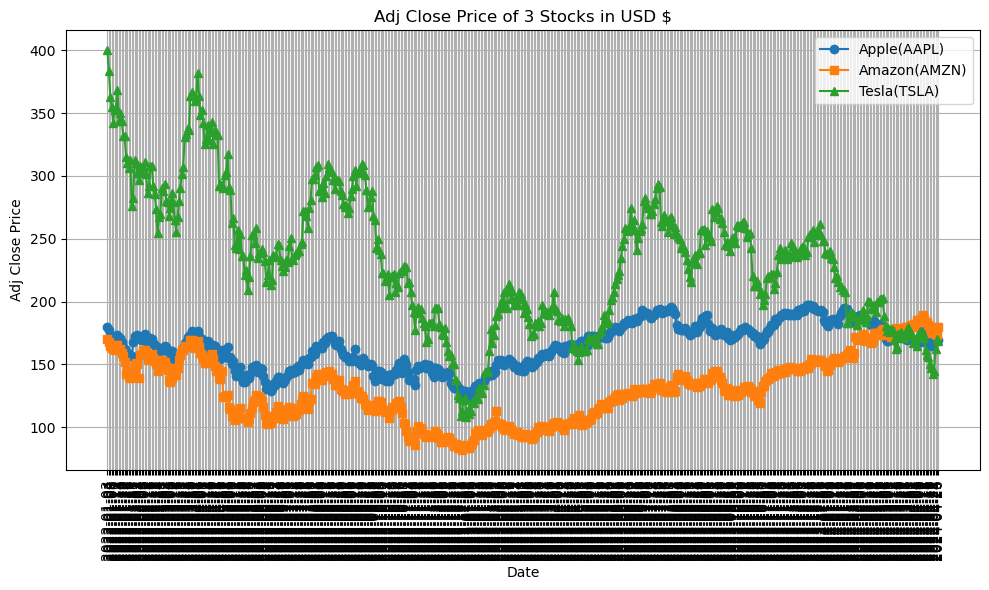

In [16]:
plt.figure(figsize=(10, 6))
dates= df1['Date']
# adj_close=[df1['Adj Close'],df2['Adj Close'],df3['Adj Close']]
plt.plot(dates, df1['Adj Close'], label='Apple(AAPL)', marker='o')
plt.plot(dates, df2['Adj Close'], label='Amazon(AMZN)', marker='s')
plt.plot(dates, df3['Adj Close'], label='Tesla(TSLA)', marker='^')

plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price of 3 Stocks in USD $')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

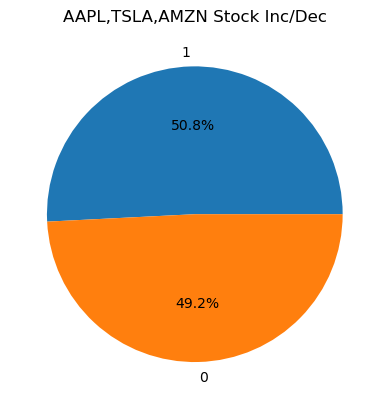

In [17]:
value_counts = df['Label'].value_counts()
pie_data = value_counts.values
pie_labels = value_counts.index
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")
plt.title("AAPL,TSLA,AMZN Stock Inc/Dec")
plt.show()

In [18]:
#  df.drop('Unnamed: 0',axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1746 non-null   int64  
 1   Date        1746 non-null   object 
 2   Open        1746 non-null   float64
 3   High        1746 non-null   float64
 4   Low         1746 non-null   float64
 5   Close       1746 non-null   float64
 6   Adj Close   1746 non-null   float64
 7   Volume      1746 non-null   int64  
 8   title       1746 non-null   object 
 9   Label       1746 non-null   int64  
 10  Company     1746 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 150.2+ KB


In [20]:
df=df.drop('Unnamed: 0',axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1746 non-null   object 
 1   Open       1746 non-null   float64
 2   High       1746 non-null   float64
 3   Low        1746 non-null   float64
 4   Close      1746 non-null   float64
 5   Adj Close  1746 non-null   float64
 6   Volume     1746 non-null   int64  
 7   title      1746 non-null   object 
 8   Label      1746 non-null   int64  
 9   Company    1746 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 136.5+ KB


In [22]:
df['Company'].value_counts()

1    582
2    582
3    582
Name: Company, dtype: int64

In [23]:
df_sorted=df.sort_values(by='Date')

In [24]:
df_sorted.reset_index(drop=True,inplace=True)

In [25]:
df_sorted['Company'].value_counts()

1    582
3    582
2    582
Name: Company, dtype: int64

In [26]:
df_sorted

,Date,Open,High,Low,Close,Adj Close,Volume,title,Label,Company
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900,What A 'Strong' Apple 2022 Product Line Up Cou...,1,1
1,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,LG Energy Solution starts taking orders for wh...,1,3
2,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,Updating 2021 Calls While Suggesting Strategic...,1,2
3,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400,Is $3 Trillion Just the Beginning for Apple? A...,0,1
4,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,"Tesla opens showroom in Xinjiang, the Chinese ...",0,3
...,...,...,...,...,...,...,...,...,...,...
1741,2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300,This Spectacular Vanguard ETF Could Turn $250 ...,1,1
1742,2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,"If You Invested $10,000 in Amazon 10 Years Ago...",0,2
1743,2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,"1 Unstoppable Stock That Could Join Microsoft,...",1,2
1744,2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400,"1 Unstoppable Stock That Could Join Microsoft,...",0,1


In [27]:
for open,close,label in df_sorted.iloc[:,[1,4,8]].values:
    if open<=close:
        label = 1
    elif open>close:
        label = 0

In [28]:
df_sorted

,Date,Open,High,Low,Close,Adj Close,Volume,title,Label,Company
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900,What A 'Strong' Apple 2022 Product Line Up Cou...,1,1
1,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,LG Energy Solution starts taking orders for wh...,1,3
2,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,Updating 2021 Calls While Suggesting Strategic...,1,2
3,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400,Is $3 Trillion Just the Beginning for Apple? A...,0,1
4,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,"Tesla opens showroom in Xinjiang, the Chinese ...",0,3
...,...,...,...,...,...,...,...,...,...,...
1741,2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300,This Spectacular Vanguard ETF Could Turn $250 ...,1,1
1742,2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,"If You Invested $10,000 in Amazon 10 Years Ago...",0,2
1743,2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,"1 Unstoppable Stock That Could Join Microsoft,...",1,2
1744,2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400,"1 Unstoppable Stock That Could Join Microsoft,...",0,1


In [29]:
df_sorted.describe()

,Open,High,Low,Close,Adj Close,Volume,Label,Company
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1.746000e+03,1746.000000,1746.000000
mean,176.388535,179.325647,173.307461,176.335141,175.947713,8.222086e+07,0.508018,2.000000
std,56.488275,57.970267,54.693305,56.227667,56.327727,3.774146e+07,0.500079,0.816731
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.237840e+07,0.000000,1.000000
25%,140.062504,142.084999,137.667503,139.432503,138.891369,5.428198e+07,0.000000,1.000000
50%,168.699997,170.544998,166.310005,168.430001,167.568230,7.266135e+07,1.000000,2.000000
75%,194.015003,196.375004,191.752495,193.862503,193.449539,1.007433e+08,1.000000,3.000000
max,396.516663,402.666656,378.679993,399.926666,399.926666,3.065906e+08,1.000000,3.000000


In [30]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1746 non-null   object 
 1   Open       1746 non-null   float64
 2   High       1746 non-null   float64
 3   Low        1746 non-null   float64
 4   Close      1746 non-null   float64
 5   Adj Close  1746 non-null   float64
 6   Volume     1746 non-null   int64  
 7   title      1746 non-null   object 
 8   Label      1746 non-null   int64  
 9   Company    1746 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 136.5+ KB


In [31]:
df_sorted['Volume']=df_sorted['Volume'].astype(np.float64)
df_sorted['Label']=df_sorted['Label'].astype(np.float64)
df_sorted['Company']=df_sorted['Company'].astype(np.float64)


In [32]:
df_sorted['title'][0]

"What A 'Strong' Apple 2022 Product Line Up Could Look Like, Featuring A Possible 'Holy Grail' Release Apple: Quality Name To Own; AR/VR To Drive Growth Robust iPhone Demand, Services Will Chart Apple's Course In 2022: Wedbush 'Son, get a lawyer. That woman is going to take away your inheritance!â\x80\x99 The most popular Moneyist columns of 2021 Tesla Q4 Deliveries, Santa Rally Eludes Bitcoin, Apple In 2022, Spider-Man At Box Office, Singapore GDP Rebound: 5 Headlines You May Have Missed From The Weekend Have $2,000? These 2 Stocks Could Be Bargain Buys for 2022 and Beyond Should WisdomTree U.S. LargeCap Dividend ETF (DLN) Be on Your Investing Radar? Should Vanguard Russell 1000 Growth ETF (VONG) Be on Your Investing Radar? 3 Surefire Metaverse Stocks That Could Make You Richer in 2022 Stock picking in 2022? Goldman Sachs says these are the companies that should be on your radar. 3 Dividend Kings That Should Help You Pull Through Inflation in 2022 Implied Volatility Surging for Apple 

In [33]:
df_sorted['title'][452]

"2 Companies That Could Be the Next Stock-Split Stocks After Amazon, Shopify, and Tesla 4 Stocks I Wouldn't Buy With Free Money Tesla Sales Of China-Made EVs Plunge 64% Sequentially In July â\x80\x94 Domestic Sales Trail Local Players Proceed With Caution When Considering This Ultra Popular EV Stock Indian Billionaire Outperforming Elon Musk, Jeff Bezos This Year Takes Zero Salary Home Bed Bath & Beyond leads rally in 'meme' stocks as Reddit group appears to be jumping back on board Elon Musk On Why First Moon Landing Was An 'Anomaly' Baillie Gifford Nearly Cuts Alibaba Position, Sells Tesla Shares â\x80\x94 But Buys More Of This Chinese EV Maker These 18 tech stocks are this earnings season's standouts based on three criteria The red flag that preceded a halving of global equities in 2000 and 2007 is back, warns Citi American Axle (AXL) Q2 Earnings & Revenues Beat Estimates Westport (WPRT) Q2 Loss Narrower Than Expected, Revenues Up Tesla Stock Jumped 80% During The 2020 Share Split. 

In [34]:
df_sorted['Label'].value_counts()

1.0    887
0.0    859
Name: Label, dtype: int64

In [35]:
def cleaning_text(text):
    text=text.lower() # converts text to lower case 
    text=re.sub('\[.*?\]', '', text) # deletes text which is present in between square brackets
    text = re.sub(r'[^\x00-\x7F]+', ' ', text) # only keeps the text between the ascii values 
    text = re.sub(r'\([^)]*\)', '', text) # deletes the text containing () these brackets
    text = re.sub(r'[^A-Za-z0-9\s]', '', text) # removes text which is not alphanumeric or whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text) # removes whitespace in the text
    return text




In [36]:
# Checking the difference in text
df_sorted['title'][256]

"Bill Gates says Elon Musk's approach to misinformation could make Twitter worse 'Massive Misallocation' Of Capital: Cathie Wood Joins Elon Musk To Find Fault With Passive Investment Bill Gates Says Shorting Tesla Not A Statement About Climate Change Why Nio, Other EV Peers Are Shooting Up In Hong Kong Today Bill Gates Takes Swipe At Elon Musk Over Twitter Acquisition: 'He Actually Could Make It Worse' Tesla Battery Supplier CATL's Stock Tumbles As Profit Falls 24% On High Raw Material Costs Can Apple Be The New Tesla - Smartphone On Wheels By 2025? Yuga Labs Refunds Failed Transactions After $150M Ethereum 'Wasted Fees' From NFT Sale How to Buy Tesla for the Cost of a Penny Stock Elon Musk's Starlink Now Lets You Take Your Internet Connection Anywhere Within US â\x80\x94 But It Comes At A Cost Russian Rocket Body Shatters Into 16 Pieces In Space Ford Mach-E EV Sales Nearly Double In April, Gas-Powered Mustang Struggles Twitter Faces Advertiser Skepticism At New York Event Ahead Of Elo

In [37]:
check=cleaning_text(df_sorted['title'][256])
check

'bill gates says elon musks approach to misinformation could make twitter worse massive misallocation of capital cathie wood joins elon musk to find fault with passive investment bill gates says shorting tesla not a statement about climate change why nio other ev peers are shooting up in hong kong today bill gates takes swipe at elon musk over twitter acquisition he actually could make it worse tesla battery supplier catls stock tumbles as profit falls 24 on high raw material costs can apple be the new tesla smartphone on wheels by 2025 yuga labs refunds failed transactions after 150m ethereum wasted fees from nft sale how to buy tesla for the cost of a penny stock elon musks starlink now lets you take your internet connection anywhere within us but it comes at a cost russian rocket body shatters into 16 pieces in space ford mache ev sales nearly double in april gaspowered mustang struggles twitter faces advertiser skepticism at new york event ahead of elon musk takeover twitter offsho

In [38]:
# apply the cleaning_text function to the title column of the df_sorted dataframe

In [39]:
df_sorted['clean_title']=df_sorted['title'].apply(lambda x : cleaning_text(x))

In [40]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1746 non-null   object 
 1   Open         1746 non-null   float64
 2   High         1746 non-null   float64
 3   Low          1746 non-null   float64
 4   Close        1746 non-null   float64
 5   Adj Close    1746 non-null   float64
 6   Volume       1746 non-null   float64
 7   title        1746 non-null   object 
 8   Label        1746 non-null   float64
 9   Company      1746 non-null   float64
 10  clean_title  1746 non-null   object 
dtypes: float64(8), object(3)
memory usage: 150.2+ KB


In [41]:
df_sorted[['title','clean_title']].iloc[0,:]

title          What A 'Strong' Apple 2022 Product Line Up Cou...
clean_title    what a strong apple 2022 product line up could...
Name: 0, dtype: object

In [42]:
df4=df_sorted.drop('title',axis=1)

In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1746 non-null   object 
 1   Open         1746 non-null   float64
 2   High         1746 non-null   float64
 3   Low          1746 non-null   float64
 4   Close        1746 non-null   float64
 5   Adj Close    1746 non-null   float64
 6   Volume       1746 non-null   float64
 7   Label        1746 non-null   float64
 8   Company      1746 non-null   float64
 9   clean_title  1746 non-null   object 
dtypes: float64(8), object(2)
memory usage: 136.5+ KB


In [44]:
df4['clean_title']

0       what a strong apple 2022 product line up could...
1       lg energy solution starts taking orders for wh...
2       updating 2021 calls while suggesting strategic...
3       is 3 trillion just the beginning for apple app...
4       tesla opens showroom in xinjiang the chinese r...
                              ...                        
1741    this spectacular vanguard etf could turn 250 p...
1742    if you invested 10000 in amazon 10 years ago t...
1743    1 unstoppable stock that could join microsoft ...
1744    1 unstoppable stock that could join microsoft ...
1745    tesla investor touts ev giants billionsmile le...
Name: clean_title, Length: 1746, dtype: object

In [45]:
df4.reset_index()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Label,Company,clean_title
0,0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900.0,1.0,1.0,what a strong apple 2022 product line up could...
1,1,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0,1.0,3.0,lg energy solution starts taking orders for wh...
2,2,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000.0,1.0,2.0,updating 2021 calls while suggesting strategic...
3,3,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400.0,0.0,1.0,is 3 trillion just the beginning for apple app...
4,4,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300.0,0.0,3.0,tesla opens showroom in xinjiang the chinese r...
...,...,...,...,...,...,...,...,...,...,...,...
1741,1741,2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300.0,1.0,1.0,this spectacular vanguard etf could turn 250 p...
1742,1742,2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400.0,0.0,2.0,if you invested 10000 in amazon 10 years ago t...
1743,1743,2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800.0,1.0,2.0,1 unstoppable stock that could join microsoft ...
1744,1744,2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400.0,0.0,1.0,1 unstoppable stock that could join microsoft ...


In [46]:
df4['Label']=df4['Label'].astype(int)

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1746 non-null   object 
 1   Open         1746 non-null   float64
 2   High         1746 non-null   float64
 3   Low          1746 non-null   float64
 4   Close        1746 non-null   float64
 5   Adj Close    1746 non-null   float64
 6   Volume       1746 non-null   float64
 7   Label        1746 non-null   int32  
 8   Company      1746 non-null   float64
 9   clean_title  1746 non-null   object 
dtypes: float64(7), int32(1), object(2)
memory usage: 129.7+ KB


In [48]:
# Removal of stopwords 

In [49]:
# pip install nltk

In [50]:
# # Download the stopwords
# nltk.download('stopwords')

In [51]:
# Get the stop words list
stop_words = set(stopwords.words('english'))

In [52]:
def remove_stopwords(text):
    words = text.split()
    cleaned_text = ' '.join(word for word in words if word.lower() not in stop_words)
    return cleaned_text

In [53]:
df4['clean_title']=df4['clean_title'].apply(remove_stopwords)

In [54]:
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Company,clean_title
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481140,104487900.0,1,1.0,strong apple 2022 product line could look like...
1,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400.0,1,3.0,lg energy solution starts taking orders could ...
2,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000.0,1,2.0,updating 2021 calls suggesting strategic posit...
3,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400.0,0,1.0,3 trillion beginning apple apple car come prep...
4,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300.0,0,3.0,tesla opens showroom xinjiang chinese region a...


## Applying Lemmatisation 

In [55]:
# nltk.download('wordnet')

In [56]:
lemmatizer= WordNetLemmatizer()

In [57]:
def lemmatize_text(text):
    tokens=text.split()
    text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
    return text

In [58]:
df4['clean_title']=df4['clean_title'].apply(lemmatize_text)

In [59]:
df4['clean_title']

0       strong apple 2022 product line could look like...
1       lg energy solution start taking order could so...
2       updating 2021 call suggesting strategic positi...
3       3 trillion beginning apple apple car come prep...
4       tesla open showroom xinjiang chinese region as...
                              ...                        
1741    spectacular vanguard etf could turn 250 per mo...
1742    invested 10000 amazon 10 year ago much would t...
1743    1 unstoppable stock could join microsoft apple...
1744    1 unstoppable stock could join microsoft apple...
1745    tesla investor tout ev giant billionsmile leap...
Name: clean_title, Length: 1746, dtype: object

## Creating Pretrained word2vec for clean_text

In [60]:
# slashing the below code to not make it run for subsequent runs of the notebook , and the word embedding are stored to pre_trained_word2vec.csv file in 
# which the values are stored of clean_title

In [61]:
# pip install gensim

In [62]:
model = api.load("word2vec-google-news-300")

In [63]:
# this is a function to convert a text paragraph into vector
def document_to_vector(document,model):
    words=document.split()
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:
        return np.zeros(model.vector_size)
    document_vector = np.mean(word_vectors,axis=0)
    return document_vector

In [64]:
pre_trained_word2vec = df4['clean_title'].apply(lambda x: document_to_vector(x,model))

In [65]:
type(pre_trained_word2vec)

pandas.core.series.Series

In [66]:
pre_trained_word2vec.to_pickle('pre_trained_word2vec.pkl')

In [67]:
pre_trained_word2vec=pd.read_pickle('pre_trained_word2vec.pkl')

In [68]:
# with open('pre_trained_word2vec.pkl', 'wb') as file:
#     pickle.dump(pre_trained_word2vec, file)

In [69]:
# with open('pre_trained_word2vec.pkl', 'rb') as file:
#     pre_trained_word2vec = pickle.load(file)

In [70]:
# pre_trained_word2vec.to_csv("pre_trained_word2vec.csv")

In [71]:
# saved the word embeddings of the clean title column to local storage for future use purpose 

In [72]:
# pre_trained_word2vec= pd.read_csv(r"C:\Users\Jaya Teja\Stock_Sentiment_Analysis_Using_Machine_Learning_Open_Project\Finance_Project\pre_trained_word2vec.csv")

In [73]:
# len(pre_trained_word2vec[0])
pre_trained_word2vec

0       [0.00953895, 0.0009532198, -0.011498066, 0.083...
1       [-0.0003925652, 0.032543052, 0.020452728, 0.06...
2       [0.016471973, 0.0005563463, -0.024610301, 0.08...
3       [-0.015810648, 0.008278012, -0.009677172, 0.08...
4       [0.013206236, 0.034184013, 0.032716233, 0.0666...
                              ...                        
1741    [0.015834594, 0.030510034, 0.006982439, 0.0995...
1742    [0.011908263, 0.020769238, -0.031156182, 0.099...
1743    [0.012385833, 0.020524636, -0.014020858, 0.091...
1744    [0.008278037, 0.002114206, -0.003083715, 0.082...
1745    [0.021268114, 0.0144314235, 0.038091447, 0.066...
Name: clean_title, Length: 1746, dtype: object

In [74]:
pre_trained_word2vec.shape

(1746,)

## Model on pretrained Word2VEc

In [75]:
# LR 0.62
# NB 0.47
# SVM linear 0.68
# DT 0.39
# RF 0.43
# LSTM 0.43
#GRU 0.50

In [76]:
test_size=51

In [77]:
X_test=pre_trained_word2vec[-test_size:]
y_test=df4['Label'][-test_size:]

In [78]:
comb_train=pd.concat([pre_trained_word2vec[:-test_size],df4['Label'][:-test_size]],axis=1)
comb_train

,clean_title,Label
0,"[0.00953895, 0.0009532198, -0.011498066, 0.083...",1
1,"[-0.0003925652, 0.032543052, 0.020452728, 0.06...",1
2,"[0.016471973, 0.0005563463, -0.024610301, 0.08...",1
3,"[-0.015810648, 0.008278012, -0.009677172, 0.08...",0
4,"[0.013206236, 0.034184013, 0.032716233, 0.0666...",0
...,...,...
1690,"[0.0035990665, -0.00943854, -0.0023566799, 0.1...",0
1691,"[0.0057910015, -0.010157753, -0.0030250696, 0....",0
1692,"[0.015489157, 0.02618864, 0.03529774, 0.063434...",1
1693,"[0.019545667, 0.03352487, -0.011951564, 0.0652...",1


In [79]:
shuffled_df = comb_train.sample(frac=1, random_state=42)

In [80]:
shuffled_df

,clean_title,Label
931,"[0.01759564, 0.042590994, 0.0029557352, 0.0623...",1
1398,"[0.037093285, 0.028283658, -0.008905867, 0.073...",0
1561,"[0.014046447, 0.024543878, -0.016828403, 0.064...",0
1006,"[0.028023219, 0.016265105, -0.029059255, 0.081...",1
506,"[0.025667364, 0.0026389034, -0.040504977, 0.09...",0
...,...,...
1130,"[0.024268547, 0.0015622256, -0.007930263, 0.08...",1
1294,"[0.029942995, 0.010589203, 0.0030866351, 0.084...",0
860,"[-0.0085476255, 0.018998034, -0.002109948, 0.0...",1
1459,"[0.0042967224, -0.0075990804, -0.0132278185, 0...",1


In [81]:
X_train=shuffled_df['clean_title']
y_train=shuffled_df['Label']

In [82]:
X_train

931     [0.01759564, 0.042590994, 0.0029557352, 0.0623...
1398    [0.037093285, 0.028283658, -0.008905867, 0.073...
1561    [0.014046447, 0.024543878, -0.016828403, 0.064...
1006    [0.028023219, 0.016265105, -0.029059255, 0.081...
506     [0.025667364, 0.0026389034, -0.040504977, 0.09...
                              ...                        
1130    [0.024268547, 0.0015622256, -0.007930263, 0.08...
1294    [0.029942995, 0.010589203, 0.0030866351, 0.084...
860     [-0.0085476255, 0.018998034, -0.002109948, 0.0...
1459    [0.0042967224, -0.0075990804, -0.0132278185, 0...
1126    [-0.0021136715, 0.012242269, -0.007951846, 0.0...
Name: clean_title, Length: 1695, dtype: object

In [83]:
X_test

1695    [0.0395968, 0.006833031, 0.02979206, 0.0661980...
1696    [-0.046929847, 0.019781286, 0.033206835, 0.034...
1697    [-0.010227203, 0.015324116, -0.03001523, 0.062...
1698    [0.03173436, 0.03086003, -0.025545392, 0.08155...
1699    [0.016684579, 0.013998957, -0.033993144, 0.077...
1700    [0.030827412, 0.03408394, 0.017991582, 0.07236...
1701    [0.000238234, -0.030210925, -0.001413653, 0.05...
1702    [0.006989282, 0.024664508, 0.029816903, 0.0595...
1703    [0.04539985, 0.014858427, -0.0127836745, 0.085...
1704    [0.026466815, 0.012575687, -0.021656517, 0.091...
1705    [0.013741349, 0.053104516, 0.02131647, 0.06223...
1706    [0.01728241, -0.0012255097, -0.0027375603, 0.0...
1707    [0.00061194104, 0.02229309, 0.022024129, 0.064...
1708    [-0.00081800064, -0.021912124, -0.0057351636, ...
1709    [0.01758284, 0.0040020053, -0.01934619, 0.0681...
1710    [-0.01781486, 0.01153008, -0.014107738, 0.0948...
1711    [-0.0048423903, 0.015892163, 0.05403569, 0.060...
1712    [0.017

In [84]:
# Converted the above data to list so that it can scale it and fit it to LR

In [85]:
scaler=StandardScaler()

In [86]:
X_train=scaler.fit_transform(X_train.to_list())
X_test=scaler.transform(X_test.to_list())

###  Optimise the model through grid search CV for right parameters , use Early Stopping , Use Cross Validation f

In [87]:
model=SVC(probability=True)

In [88]:
pipeline = Pipeline([('clf',model)])

## Unmark the below code accordingly

In [89]:
# param_grid = {
#     'clf__C': [1, 2, 3],
#     'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'clf__max_iter': [-1,10,100,]
# }
param_grid = {
    'clf__C':[1],
    'clf__kernel':['linear'],
    'clf__max_iter':[-1]
}

In [90]:
# slashing the above paramgrid because it take lots of time to run when we restart the notebook so the best parameters were only considered in the 2nd param grid so that
# it takes less time !!!!!!

In [91]:
grid_search=GridSearchCV(estimator=pipeline,verbose=4,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)


### Finding best parameter only on TRAIN SET

In [ ]:
grid_search.fit(X_train.tolist(),y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
y_pred=best_model.predict(X_test.tolist())

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
yyy=best_model.predict(X_train)

In [ ]:
accuracy_score(y_train,yyy)

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
# considering 1 as the class of intrest and plotting the ROC curve

In [ ]:
y_prob= best_model.predict_proba(X_test.tolist())[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
roc_auc=auc(fpr, tpr)
roc_auc

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
counts = pd.Series(y_pred).value_counts()

# Labels for the pie chart
labels = ['Decrease', 'Increase']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%',  colors=['red', 'green'])
plt.title('Proportion of Increases and Decreases in Test Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df4

In [ ]:
pre_trained_word2vec[-test_size:]

In [ ]:
# port_df=pd.merge()
(y_pred)

In [ ]:
new_index = range(1695, 1695 + len(y_pred))
new_index

In [ ]:
y_pred=pd.Series(y_pred)
(y_pred).index=new_index
# pd.Series(y_pred)
y_pred.name='pred_Label'

In [ ]:
port_df=pd.concat([df4.iloc[-test_size:,:],(y_pred)],axis=1)

In [ ]:
# pd.Series(y_pred)
port_df.head()

In [ ]:
port_df=port_df.sort_values(by=['Company','Date'])
port_df.head()

# Strategy 1

In [ ]:
# 1 indicates buying at open price and selling at close price 
# 0 indicates short selling that is selling at open price and buying it at close price 
# and for each transaction ie each day only 10 stocks are only used 

In [ ]:
profits_aapl=0
stocks = 10
returns_aapl=[]
trades_aapl=0
s_trades_aapl=0
for open,close,label in port_df.iloc[:17,[1,4,10]].values:
    if label==1:
        profits_aapl+=(stocks*(close-open))
        returns_aapl.append((close-open)/open)
        if close>open:
            s_trades_aapl+=1
        trades_aapl+=2
    if label==0:
        profits_aapl+=(stocks*(open-close))
        returns_aapl.append((open-close)/open)
        if(open>close):
            s_trades_aapl+=1
        trades_aapl+=2
profits_aapl

In [ ]:
returns_aapl=pd.Series(returns_aapl)
returns_aapl.name='Apple'

In [ ]:
profits_amzn=0
stocks = 10
returns_amzn=[]
trades_amzn=0
s_trades_amzn=0
for open,close,label in port_df.iloc[17:34,[1,4,10]].values:
    if label==1:
        profits_amzn+=(stocks*(close-open))
        returns_amzn.append((close-open)/open)
        if close>open:
            s_trades_amzn+=1
        trades_amzn+=2
    if label==0:
        profits_amzn+=(stocks*(open-close))
        returns_amzn.append((open-close)/open)
        if(open>close):
            s_trades_amzn+=1
        trades_amzn+=2
profits_amzn

In [ ]:
returns_amzn=pd.Series(returns_amzn)
returns_amzn.name='Amazon'

In [ ]:
profits_tsla=0
stocks = 10
returns_tsla=[]
trades_tsla=0
s_trades_tsla=0
for open,close,label in port_df.iloc[34:51,[1,4,10]].values:
    if label==1:
        profits_tsla+=(stocks*(close-open))
        returns_tsla.append((close-open)/open)
        if close>open:
            s_trades_tsla+=1
        trades_tsla+=2
    if label==0:
        profits_tsla+=(stocks*(open-close))
        returns_tsla.append((open-close)/open)
        if(open>close):
            s_trades_tsla+=1
        trades_tsla+=2
profits_tsla

In [ ]:
returns_tsla=pd.Series(returns_tsla)
returns_tsla.name='Tesla'

In [ ]:
pd.concat([pd.Series(returns_aapl),pd.Series(returns_amzn),pd.Series(returns_tsla)],axis=1)

In [ ]:
print(f"Profit/Loss in APPLE: {profits_aapl} $")
print(f"Profit/Loss in AMAZON: {profits_amzn} $")
print(f"Profit/Loss in TSLA: {profits_tsla} $")
print(f"Profit/Loss in TOTAL: {profits_aapl+profits_amzn+profits_tsla} $")

In [ ]:
company_names = ['Apple(AAPL)', 'Amazon(AMZN)', 'Tesla(TSLA)']
profit_loss_values = [profits_aapl, profits_amzn, profits_tsla]
plt.bar(company_names, profit_loss_values, color=['green' if value >= 0 else 'red' for value in profit_loss_values])
plt.xlabel('Companies')
plt.ylabel('Profit/Loss')
plt.title('Profit or Loss of Companies')
plt.axhline(0, color='black', linewidth=0.1)
plt.show()

In [ ]:
image = Image.open(r"C:\Users\Jaya Teja\Stock_Sentiment_Analysis_Using_Machine_Learning_Open_Project\Finance_Project\US Treasury Rate of a Year from market watch.png")
display(image)


In [ ]:
portfolio_returns = np.array([returns_aapl, returns_amzn, returns_tsla])
mean_returns = portfolio_returns.mean(axis=1)
weights = np.array([1/3, 1/3, 1/3])
portfolio_mean_return = np.dot(mean_returns, weights)
cov_matrix = np.cov(portfolio_returns)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
annual_free_rate = 5.096/100
risk_free_rate = (1+annual_free_rate)**(1/252) - 1 # 252 trading days in a year and calculating for daily
sharpe_ratio = (portfolio_mean_return - risk_free_rate) / portfolio_std_dev

In [ ]:
print("Portfolio Mean Return:", portfolio_mean_return)
print("Risk-Free Rate (R_f):", risk_free_rate)
print("Portfolio Standard Deviation:", portfolio_std_dev)
print("Sharpe Ratio:", sharpe_ratio)

In [ ]:
def calculate_max_drawdown(returns):
    max_drawdown = 0
    peak = trough = 0
    cumulative_returns = np.cumprod(1 + returns) - 1
    for i in range(len(cumulative_returns)):
        if cumulative_returns[i] > cumulative_returns[peak]:
            peak = trough = i
        elif cumulative_returns[i] < cumulative_returns[trough]:
            trough = i
        drawdown = (cumulative_returns[peak] - cumulative_returns[trough]) / (1 + cumulative_returns[peak])
        max_drawdown = max(max_drawdown, drawdown)
    return max_drawdown*100

In [ ]:
max_drawdown_aapl = calculate_max_drawdown(np.array(returns_aapl))
max_drawdown_amzn = calculate_max_drawdown(np.array(returns_amzn))
max_drawdown_tsla = calculate_max_drawdown(np.array(returns_tsla))

In [ ]:
print("Maximum Drawdown for Apple(%):", max_drawdown_aapl)
print("Maximum Drawdown for Amazon(%):", max_drawdown_amzn)
print("Maximum Drawdown for Tesla(%):", max_drawdown_tsla)

In [ ]:
drawdown_values = [max_drawdown_aapl, max_drawdown_amzn, max_drawdown_tsla]
plt.bar(company_names, drawdown_values, color='#FFB6C1')
plt.xlabel('Companies')
plt.ylabel('Maximum Drawdown (%)')
plt.title('Maximum Drawdowns of Companies')
plt.axhline(0, color='black', linewidth=0.4)
plt.show()

In [ ]:
print("No. of Trades executed on Apple Stocks:",trades_aapl)
print("No. of Trades executed on Amazon Stocks:",trades_amzn)
print("No. of Trades executed on Tesla Stocks:",trades_tsla)

In [ ]:
comp_trades = [trades_aapl, trades_amzn, trades_tsla]
plt.bar(company_names, comp_trades, color='#ADD8E6')
plt.xlabel('Companies')
plt.ylabel('Number of FO Trades Executed')
plt.title('Number of Trades Executed by Company')
plt.show()

In [ ]:
print("Win Ratio on Apple Stocks:",s_trades_aapl/(trades_aapl/2))
print("Win Ratio on Amazon Stocks:",s_trades_amzn/(trades_amzn/2))
print("Win Ratio on Tesla Stocks:",s_trades_tsla/(trades_tsla/2))

In [ ]:
winr_aapl=s_trades_aapl/(trades_aapl/2)
winr_amzn=s_trades_amzn/(trades_amzn/2)
winr_tsla=s_trades_tsla/(trades_tsla/2)

In [ ]:
win_ratios = [winr_aapl,winr_amzn ,winr_tsla ]
plt.bar(company_names, win_ratios, color='#90EE90')
plt.xlabel('Companies')
plt.ylabel('Win Ratio')
plt.title('Win Ratios of Companies')
plt.show()

# Strategy 2

### Using 10 stocks for each company i.e for AAPL,AMZN,TSLA
### Assuming the news influence the stock price so close price will be the stock price,, and for initial day it will be open price(stock price) for 1 and stock price (stock price) for 0


In [ ]:
# pie chart of 1 and 0s for each companies and also the confusion matrix 

In [ ]:
counts = port_df.iloc[:17,[10]].value_counts()
labels = ['Decrease', 'Increase']
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=labels, autopct='%1.1f%%',  colors=['red', 'green'])
plt.title('Proportion of Increases and Decreases in Test Set of Apple(AAPL)')
plt.axis('equal')
plt.show()

In [ ]:
cm = confusion_matrix(port_df.iloc[:17, 7], port_df.iloc[:17, 10])
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Confusion Matrix for Test Set of Apple(AAPL)')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.axis('equal')
plt.show()

In [ ]:
aapl_profit = 0
stocks =0
count_of_1_in_aapl= 5
first_iteration = True
high_count_of_stock_in_aapl=0
returns_aapl=[]
buy_list=[]
trades_aapl=0
w_b_trades_aapl=0 # win buy trades
b_trades_aapl=0
count_aapl=0
# sell_list=[]
for open_price,close_price,pred_label in port_df.iloc[:17,[1,4,10]].values:
    count_aapl+=1
    if first_iteration:
        if pred_label == 0:
            aapl_profit -= 10 * close_price
            buy_list.append(close_price)
            b_trades_aapl+=1
        elif pred_label == 1:
            aapl_profit -= 10 * open_price
            buy_list.append(open_price)
            b_trades_aapl+=1
        stocks+=10
        trades_aapl+=1
        first_iteration = False
        continue
    if stocks>high_count_of_stock_in_aapl:
        high_count_of_stock_in_aapl=stocks                                
    if count_aapl==17:
        if pred_label==1:
            if stocks>0:
                aapl_profit+=(stocks*close_price)
                trades_aapl+=1
        elif pred_label==0:
            if stocks>0:
                aapl_profit+=(stocks*open_price)
                trades_aapl+=1
        for buy in buy_list:
            returns_aapl.append((close_price-buy)/(buy))
            if close_price>buy:
                w_b_trades_aapl+=1
        continue    
    if(pred_label==1):
        if stocks==0:
            aapl_profit-= (10*open_price)
            b_trades_aapl+=1
            buy_list.append(open_price)
            stocks+=10
            trades_aapl+=1
        elif stocks>0:
            aapl_profit+=(stocks*close_price)
            trades_aapl+=1
            for buy in buy_list:
                returns_aapl.append((close_price-buy)/(buy))
                if close_price>buy:
                    w_b_trades_aapl+=1
            buy_list=[]
            stocks=0
    elif(pred_label==0):
        trades_aapl+=1
        aapl_profit-=(10*close_price)
        b_trades_aapl+=1
        buy_list.append(close_price)
        stocks+=10
    
print(f"Through this strategy by using {high_count_of_stock_in_aapl} as highest no of stocks required , to make profit of {aapl_profit} using Apple Stocks" )


In [ ]:
returns_aapl=pd.Series(returns_aapl)
returns_aapl.name='Apple'

In [ ]:
counts = port_df.iloc[17:34,[10]].value_counts()
labels = ['Decrease', 'Increase']
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=labels, autopct='%1.1f%%',  colors=['red', 'green'])
plt.title('Proportion of Increases and Decreases in Test Set of Amazon(AMZN)')
plt.axis('equal')  
plt.show()

In [ ]:
cm = confusion_matrix(port_df.iloc[17:34, 7], port_df.iloc[17:34, 10])
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Confusion Matrix for Test Set of Amazon(AMZN)')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.axis('equal')
plt.show()

In [ ]:
amzn_profit = 0
stocks = 0
count_of_1_in_amzn= 8
first_iteration = True
high_count_of_stock_in_amzn=0
returns_amzn=[]
buy_list=[]
trades_amzn=0
w_b_trades_amzn=0
b_trades_amzn=0
count_amzn = 0
for open_price,close_price,pred_label in port_df.iloc[17:34,[1,4,10]].values:
    count_amzn+=1
    if first_iteration:
        if pred_label == 0:
            amzn_profit -= 10 * close_price
            buy_list.append(close_price)
            b_trades_amzn+=1
        elif pred_label == 1:
            amzn_profit -= 10 * open_price
            buy_list.append(open_price)
            b_trades_amzn+=1
        stocks+=10
        trades_amzn+=1
        first_iteration = False
        continue
    if stocks>high_count_of_stock_in_amzn:
        high_count_of_stock_in_amzn=stocks
    
    if count_amzn==17:
        if pred_label==1:
            if stocks>0:
                amzn_profit+=(stocks*close_price)
                trades_amzn+=1
        elif pred_label==0:
            if stocks>0:
                amzn_profit+=(stocks*open_price)
                trades_amzn+=1
        for buy in buy_list:
            returns_amzn.append((close_price-buy)/buy)
            if close_price>buy:
                w_b_trades_amzn+=1
        continue
    if(pred_label==1):
        if stocks==0:
            amzn_profit-= (10*open_price)
            b_trades_amzn+=1
            trades_amzn+=1
            buy_list.append(open_price)
            stocks+=10
        elif stocks>0:
            amzn_profit+=(stocks*close_price)
            trades_amzn+=1
            for buy in buy_list:
                returns_amzn.append((close_price-buy)/(buy))
                if close_price>buy:
                    w_b_trades_amzn+=1
            buy_list=[]
            stocks=0
    elif(pred_label==0):
        amzn_profit-=(10*close_price)
        b_trades_amzn+=1
        trades_amzn+=1
        buy_list.append(close_price)
        stocks+=10
print(f"Through this strategy by using {high_count_of_stock_in_amzn} as highest no of stocks required , to make profit of {amzn_profit} using Amazon Stocks" )



In [ ]:
len(returns_amzn)
returns_amzn=pd.Series(returns_amzn)
returns_amzn.name='Amazon'

In [ ]:
counts = port_df.iloc[34:51,[10]].value_counts()
labels = ['Decrease', 'Increase']
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=labels, autopct='%1.1f%%',  colors=['red', 'green'])
plt.title('Proportion of Increases and Decreases in Test Set of Tesla(TSLA)')
plt.axis('equal')
plt.show()

In [ ]:
cm = confusion_matrix(port_df.iloc[34:51, 7], port_df.iloc[34:51, 10])
fig, ax = plt.subplots(figsize=(3, 3))  # Adjust the figure size as needed (width, height)
plt.title('Confusion Matrix for Test Set of Tesla(TSLA)')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.axis('equal')
plt.show()

In [ ]:
tsla_profit = 0
stocks = 0
count_of_1_in_tsla= 6
first_iteration = True
high_count_of_stock_in_tsla=0
returns_tsla=[]
buy_list=[]
trades_tsla=0
w_b_trades_tsla=0
b_trades_tsla=0
count_tsla=0
for open_price,close_price,pred_label in port_df.iloc[34:51,[1,4,10]].values:
    count_tsla+=1
    if first_iteration:
        if pred_label == 0:
            tsla_profit -= 10 * close_price
            b_trades_tsla+=1
            buy_list.append(close_price)
        elif pred_label == 1:
            tsla_profit -= 10 * open_price
            b_trades_tsla+=1
            buy_list.append(open_price)
        stocks+=10
        trades_tsla+=1
        first_iteration = False
        continue
    if stocks>high_count_of_stock_in_tsla:
        high_count_of_stock_in_tsla=stocks
    if count_tsla==17:
        if pred_label==1:
            if stocks>0:
                tsla_profit+=(stocks*close_price)
                trades_tsla+=1
        elif pred_label==0:
            if stocks>0:
                tsla_profit+=(stocks*open_price)
                trades_tsla+=1
        for buy in buy_list:
            returns_tsla.append((close_price-buy)/buy)
            if close_price>buy:
                w_b_trades_tsla+=1
        continue
    if(pred_label==1):
        if stocks==0:
            tsla_profit-= (10*open_price)
            b_trades_tsla+=1
            trades_tsla+=1
            buy_list.append(open_price)
            stocks+=10
        elif stocks>0:
            tsla_profit+=(stocks*close_price)
            trades_tsla+=1
            for buy in buy_list:
                returns_tsla.append((close_price-buy)/(buy))
                if close_price>buy:
                    w_b_trades_tsla+=1
            buy_list=[]
            stocks=0
    elif(pred_label==0):
        tsla_profit-=(10*close_price)
        b_trades_tsla+=1
        trades_tsla+=1
        buy_list.append(close_price)
        stocks+=10
print(f"Through this strategy by using {high_count_of_stock_in_tsla} as highest no of stocks required , to make profit of {tsla_profit} using Tesla Stocks" )


In [ ]:
len(returns_tsla)
returns_tsla=pd.Series(returns_tsla)
returns_tsla.name='Tesla'

In [ ]:
pd.concat([pd.Series(returns_aapl),pd.Series(returns_amzn),pd.Series(returns_tsla)],axis=1)

In [ ]:
print(f"Highest no of stocks used in APPLE: {high_count_of_stock_in_aapl}")
print(f"Highest no of stocks used in AMAZON: {high_count_of_stock_in_amzn}")
print(f"Highest no of stocks used in TESLA: {high_count_of_stock_in_tsla}")
print(f"Highest no of stocks used in TOTAL: {high_count_of_stock_in_aapl+high_count_of_stock_in_amzn+high_count_of_stock_in_tsla}")

In [ ]:
print(f"Profit/Loss in APPLE: {aapl_profit} $")
print(f"Profit/Loss in AMAZON: {amzn_profit} $")
print(f"Profit/Loss in TSLA: {tsla_profit} $")
print(f"Profit/Loss in TOTAL: {aapl_profit+amzn_profit+tsla_profit} $")

In [ ]:
company_names = ['Apple(AAPL)', 'Amazon(AMZN)', 'Tesla(TSLA)']
profit_loss_values = [aapl_profit, amzn_profit, tsla_profit]
plt.bar(company_names, profit_loss_values, color=['green' if value >= 0 else 'red' for value in profit_loss_values])
plt.xlabel('Companies')
plt.ylabel('Profit/Loss')
plt.title('Profit or Loss of Companies')
plt.axhline(0, color='black', linewidth=0.1)
plt.show()



In [ ]:
all_returns= np.concatenate([returns_aapl, returns_amzn, returns_tsla])
portfolio_return = np.mean(all_returns)
portfolio_std_dev = np.std(all_returns)
annual_free_rate = 5.096/100
risk_free_rate = (1+annual_free_rate)**(1/252) - 1 # 252 trading days in a year and calculating for daily
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

In [ ]:
print("Portfolio Mean Return:", portfolio_return)
print("Risk-Free Rate (R_f):", risk_free_rate)
print("Portfolio Standard Deviation:", portfolio_std_dev)
print("Sharpe Ratio:", sharpe_ratio)

In [ ]:
def calculate_max_drawdown(returns):
    max_drawdown = 0
    peak = trough = 0
    cumulative_returns = np.cumprod(1 + returns) - 1
    for i in range(len(cumulative_returns)):
        if cumulative_returns[i] > cumulative_returns[peak]:
            peak = trough = i
        elif cumulative_returns[i] < cumulative_returns[trough]:
            trough = i
        drawdown = (cumulative_returns[peak] - cumulative_returns[trough]) / (1 + cumulative_returns[peak])
        max_drawdown = max(max_drawdown, drawdown)
    return max_drawdown*100

In [ ]:
max_drawdown_aapl = calculate_max_drawdown(returns_aapl)
max_drawdown_amzn = calculate_max_drawdown(returns_amzn)
max_drawdown_tsla = calculate_max_drawdown(returns_tsla)

In [ ]:
print("Maximum Drawdown for Apple(%):", max_drawdown_aapl)
print("Maximum Drawdown for Amazon(%):", max_drawdown_amzn)
print("Maximum Drawdown for Tesla(%):", max_drawdown_tsla)

In [ ]:
drawdown_values = [max_drawdown_aapl, max_drawdown_amzn, max_drawdown_tsla]
plt.bar(company_names, drawdown_values, color='#FFB6C1')
plt.xlabel('Companies')
plt.ylabel('Maximum Drawdown (%)')
plt.title('Maximum Drawdowns of Companies')
plt.axhline(0, color='black', linewidth=0.4)
plt.show()

In [ ]:
print("No. of Trades executed on Apple Stocks:",trades_aapl)
print("No. of Trades executed on Amazon Stocks:",trades_amzn)
print("No. of Trades executed on Tesla Stocks:",trades_tsla)

In [ ]:
comp_trades = [trades_aapl, trades_amzn, trades_tsla]
plt.bar(company_names, comp_trades, color='#ADD8E6')
plt.xlabel('Companies')
plt.ylabel('Number of FO Trades Executed')
plt.title('Number of Trades Executed by Company')
plt.show()

In [ ]:
print("Win Ratio on Apple Stocks:",w_b_trades_aapl/b_trades_aapl)
print("Win Ratio on Amazon Stocks:",w_b_trades_amzn/b_trades_amzn)
print("Win Ratio on Tesla Stocks:",w_b_trades_tsla/b_trades_tsla)

In [ ]:
winr_aapl=w_b_trades_aapl/b_trades_aapl
winr_amzn=w_b_trades_amzn/b_trades_amzn
winr_tsla=w_b_trades_tsla/b_trades_tsla

In [ ]:
win_ratios = [winr_aapl,winr_amzn ,winr_tsla ]
plt.bar(company_names, win_ratios, color='#90EE90')
plt.xlabel('Companies')
plt.ylabel('Win Ratio')
plt.title('Win Ratios of Companies')
plt.show()